# **Multiple Liner Regression Bike Sharing Assesment**

> *By Yeshvanth H J*




### Business Understanding

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.


## **Objective**

**The company wants to know:**

* Which variables are significant in predicting the demand for shared bikes.
* How well those variables describe the bike demands

**Goal**
- Build a model to identify the varible which are significant
- It will be used by the management to understand how exactly the demands vary with different features.


The Steps we will follow in this Assesment are as follows:

1. Reading, understanding and visualising the data
2. Preparing the data for modelling (train-test, split, rescalling etc..)
3. Training the model
4. Residual analysis
5. Predictions and evaluation on the test set

## Step 1: Reading, understanding and visualising the data

Let's import required liberiers

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score


from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings('ignore')

Reading the data from google path link

In [4]:
bike_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/Course 2: ML1/Linear Regression Assignment/day.csv')
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# Checking shape of data
bike_df.shape

(730, 16)

In [6]:
# Null & Data type check
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
#Missing value check
bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
#
bike_df.describe()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## 1.1 Data cleaning
  As observed the data some of the columns are not add any usefull insight, hence unnessary columns are removing

  - *instant* is row indixing will not add value to our analysis.
  - *dteday* includes the date information, already we have year, month , weekday in other column, hence removing the column.
  - casual and registered discribe the target variable cnt.

In [9]:
bike_df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

## 1.2 Data Encoding
  Columns included in the data encoding are
  - season
  - weathersite,
  - yr
  - mnth
  - weekday



In [10]:
# season : season (1:spring, 2:summer, 3:fall, 4:winter)
bike_df[['season']]=bike_df[['season']].apply(lambda x:x.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'}))

# weathersit : (- 1: Clear,  2: Mist_Cloudy, 3: Light Snow_Rain, 4: Heavy Snow_Rain)
bike_df[['weathersit']]=bike_df[['weathersit']].apply(lambda x:x.map({1: 'Clear',  2: 'Mist_Cloudy', 3: 'Light Snow_Rain', 4:'Heavy Snow_Rain'}))

# - yr : year (0: 2018, 1:2019)
bike_df[['yr']]=bike_df[['yr']].apply(lambda x:x.map({0:2018, 1:2019}))

# - mnth : month ( 1 to 12)

bike_df[['mnth']]=bike_df[['mnth']].apply(lambda x:x.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'}))

# - weekday : day of the week
#{1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'}

bike_df[['weekday']]=bike_df[['weekday']].apply(lambda x:x.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'}))

bike_df.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,jan,0,sat,0,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,0,sun,0,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
bike_df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [12]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [13]:
bike_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

## 1.3 Data Visulization

In [14]:
# Defining the Categorical Columns

cat_col=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday','weathersit',]
nume_col=['temp', 'atemp', 'hum', 'windspeed']
trgt_col=['cnt']

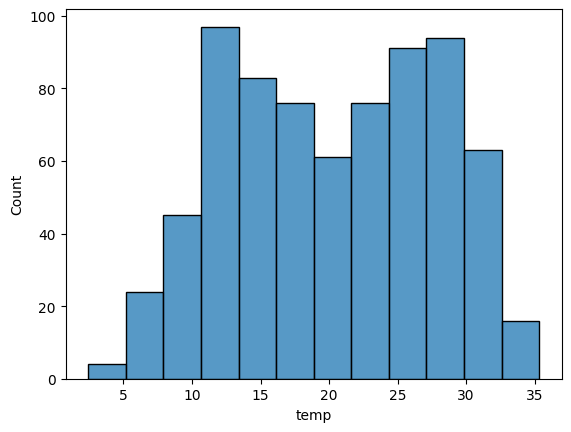

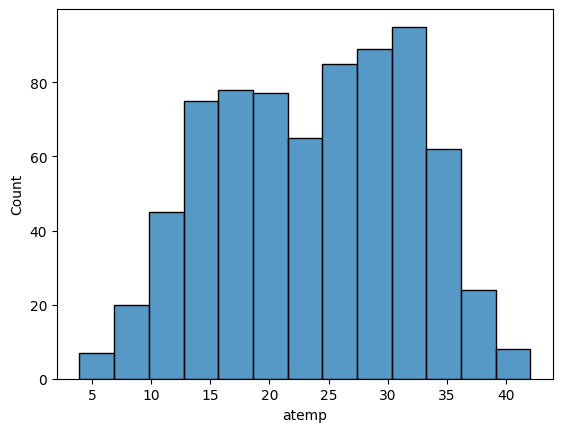

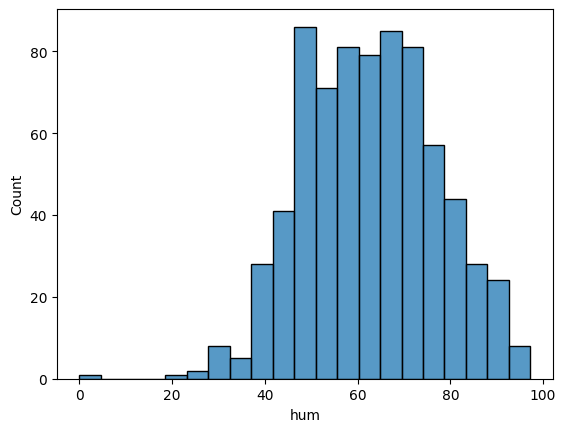

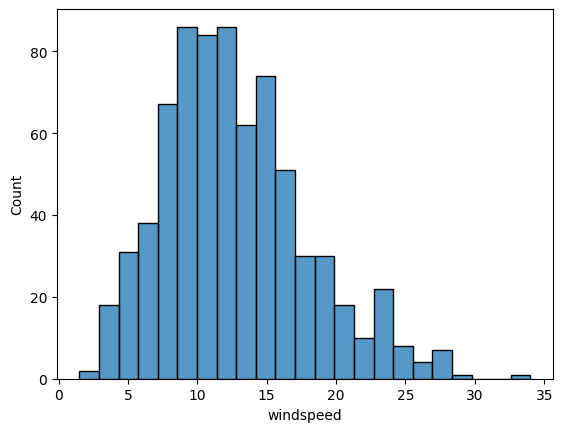

In [15]:
for col in nume_col:
  sns.histplot(x=bike_df[col])
  plt.title=bike_df[col]
  plt.show()


<Figure size 2000x1200 with 0 Axes>

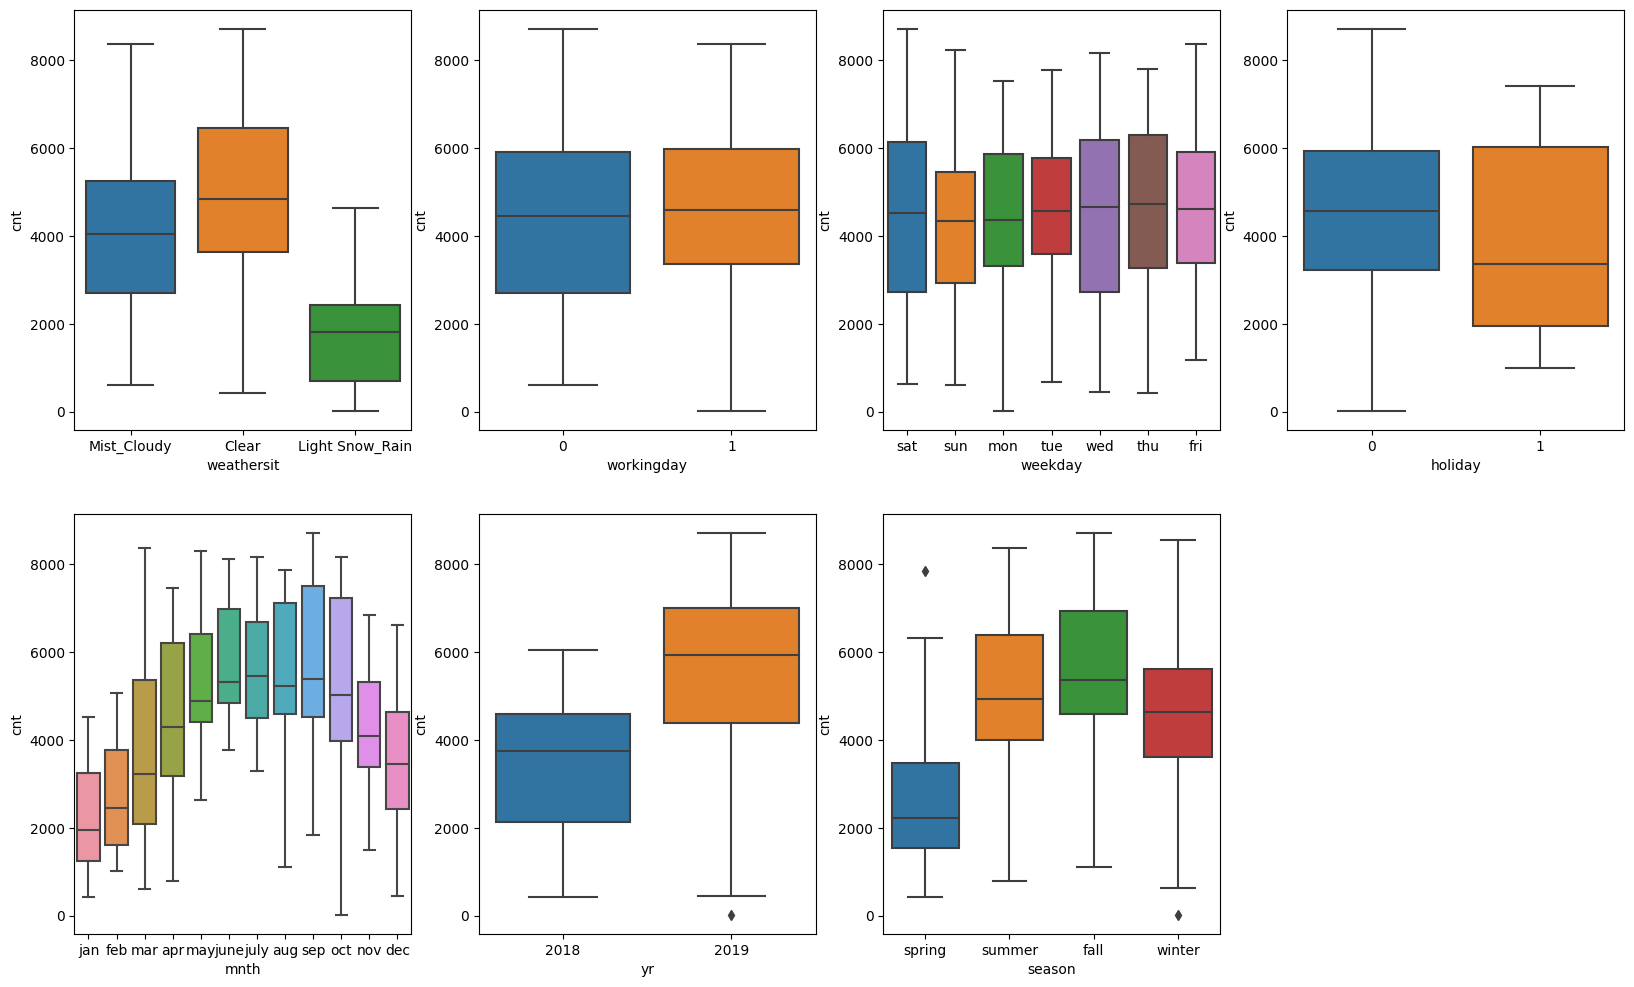

In [16]:
# By Varient Analysis

# categorical variable v/s target variable

plt.figure(figsize=(20,12))
i=len(cat_col)
plt.figure(figsize=(20,12))
for col in cat_col:
  plt.subplot(2,4,i)
  sns.boxplot(x=col,y='cnt',data=bike_df)
  i=i-1
plt.show()

From the above visulization some of usefull insights.

- Clear weather results in high booking, which appers to be evident
- Working & non Working day will not impact the booking.
- most of the booking done during may-Oct.
- More bookings are observed during the fall season.
- booking increasing 2019 as compared to last year 2018.

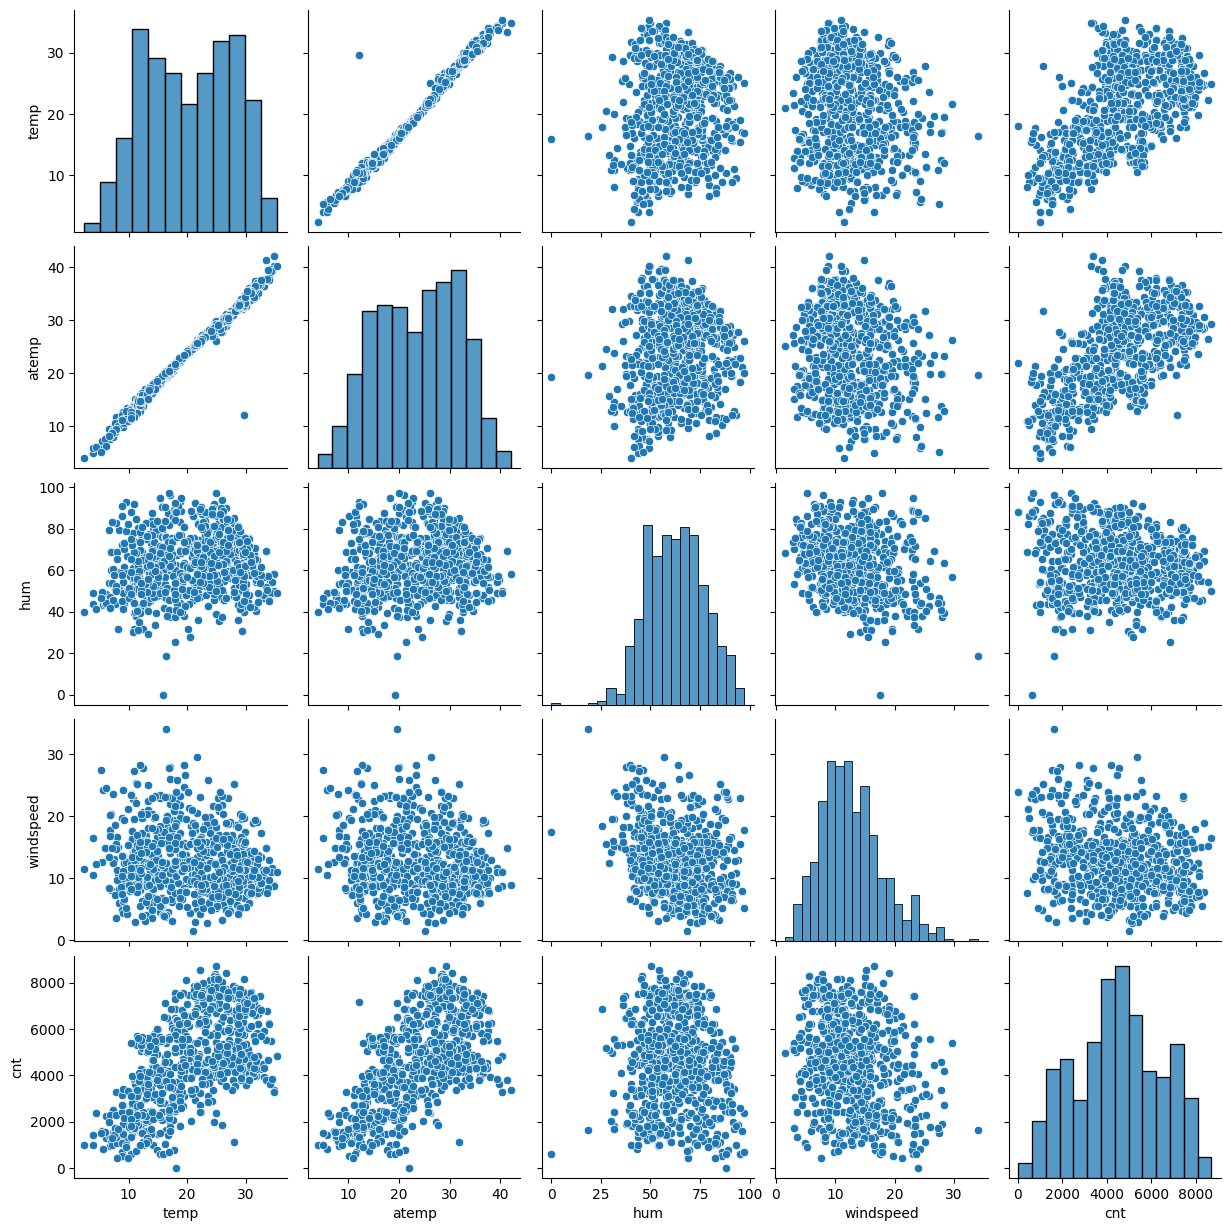

In [17]:
# Numerical + target colum visulation

sns.pairplot(data=bike_df,vars=['temp', 'atemp', 'hum', 'windspeed','cnt'])
plt.show()

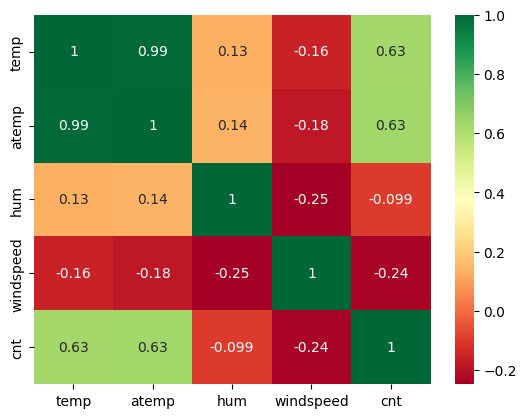

In [18]:
# Checking the correlation between Numerical variable
sns.heatmap(bike_df[['temp', 'atemp', 'hum', 'windspeed','cnt']].corr(),annot=True,cmap='RdYlGn')
plt.show()

In [19]:
bike_df.shape

(730, 12)

# **2. Preparing the data for modelling**

### 2.1 Data Pre Processing

In [20]:
# Creating the dummy variable for Character Variable (season, mnth, weekday, weathersite)

# Converting Yr back to 0 & 1

bike_df[['yr']]=bike_df[['yr']].apply(lambda x:x.map({2018:0, 2019:1}))


# Creating Dummy var
mnth_dmy=pd.get_dummies(bike_df.mnth,drop_first=True)

seasons_dmy=pd.get_dummies(bike_df.season,drop_first=True)

weathersit_dmy=pd.get_dummies(bike_df.weathersit,drop_first=True)

weekday_dmy=pd.get_dummies(bike_df.weekday,drop_first=True)

In [21]:
# Concating the Dummy data set & Bike data set

bike_df=pd.concat([bike_df,mnth_dmy,seasons_dmy,weathersit_dmy,weekday_dmy],axis=1)
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,summer,winter,Light Snow_Rain,Mist_Cloudy,mon,sat,sun,thu,tue,wed
0,spring,0,jan,0,sat,0,Mist_Cloudy,14.110847,18.18125,80.5833,...,0,0,0,1,0,1,0,0,0,0
1,spring,0,jan,0,sun,0,Mist_Cloudy,14.902598,17.68695,69.6087,...,0,0,0,1,0,0,1,0,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,0,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,0,1,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,1


In [22]:
# Dropping unwanted variables (season, mnth, weekday, weathersite)

bike_df.drop(['mnth','weekday','weathersit','season'],axis=1,inplace=True)
bike_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,summer,winter,Light Snow_Rain,Mist_Cloudy,mon,sat,sun,thu,tue,wed
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,1,0,1,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,0,0,1


In [23]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               730 non-null    int64  
 1   holiday          730 non-null    int64  
 2   workingday       730 non-null    int64  
 3   temp             730 non-null    float64
 4   atemp            730 non-null    float64
 5   hum              730 non-null    float64
 6   windspeed        730 non-null    float64
 7   cnt              730 non-null    int64  
 8   aug              730 non-null    uint8  
 9   dec              730 non-null    uint8  
 10  feb              730 non-null    uint8  
 11  jan              730 non-null    uint8  
 12  july             730 non-null    uint8  
 13  june             730 non-null    uint8  
 14  mar              730 non-null    uint8  
 15  may              730 non-null    uint8  
 16  nov              730 non-null    uint8  
 17  oct             

## 2.2 Splitting the data into Train & Test

In [24]:
# Splitting the data frame train & Test

df_train,df_test=train_test_split(bike_df,train_size=0.7,random_state=100)

print( df_train.shape)

print( df_test.shape)

(510, 30)
(220, 30)


In [25]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,summer,winter,Light Snow_Rain,Mist_Cloudy,mon,sat,sun,thu,tue,wed
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,0,0,1,0,1,0,0,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,1,0,0,1,0,1,0,0,0,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,0,...,1,0,0,1,0,0,0,0,0,0


## 2.3 Rescaling Reatures

*   MinMax scaling (convert/compress all the values between 0 to 1



In [26]:
# scaling continues variable

num_vars=['temp','atemp','hum','windspeed','cnt']

scaler=MinMaxScaler()

df_train[num_vars]= scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,summer,winter,Light Snow_Rain,Mist_Cloudy,mon,sat,sun,thu,tue,wed
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,1,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,1,0,1,0,0,0,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,1,0,0,1,0,0,0,0,0,0


# 3. Training the model

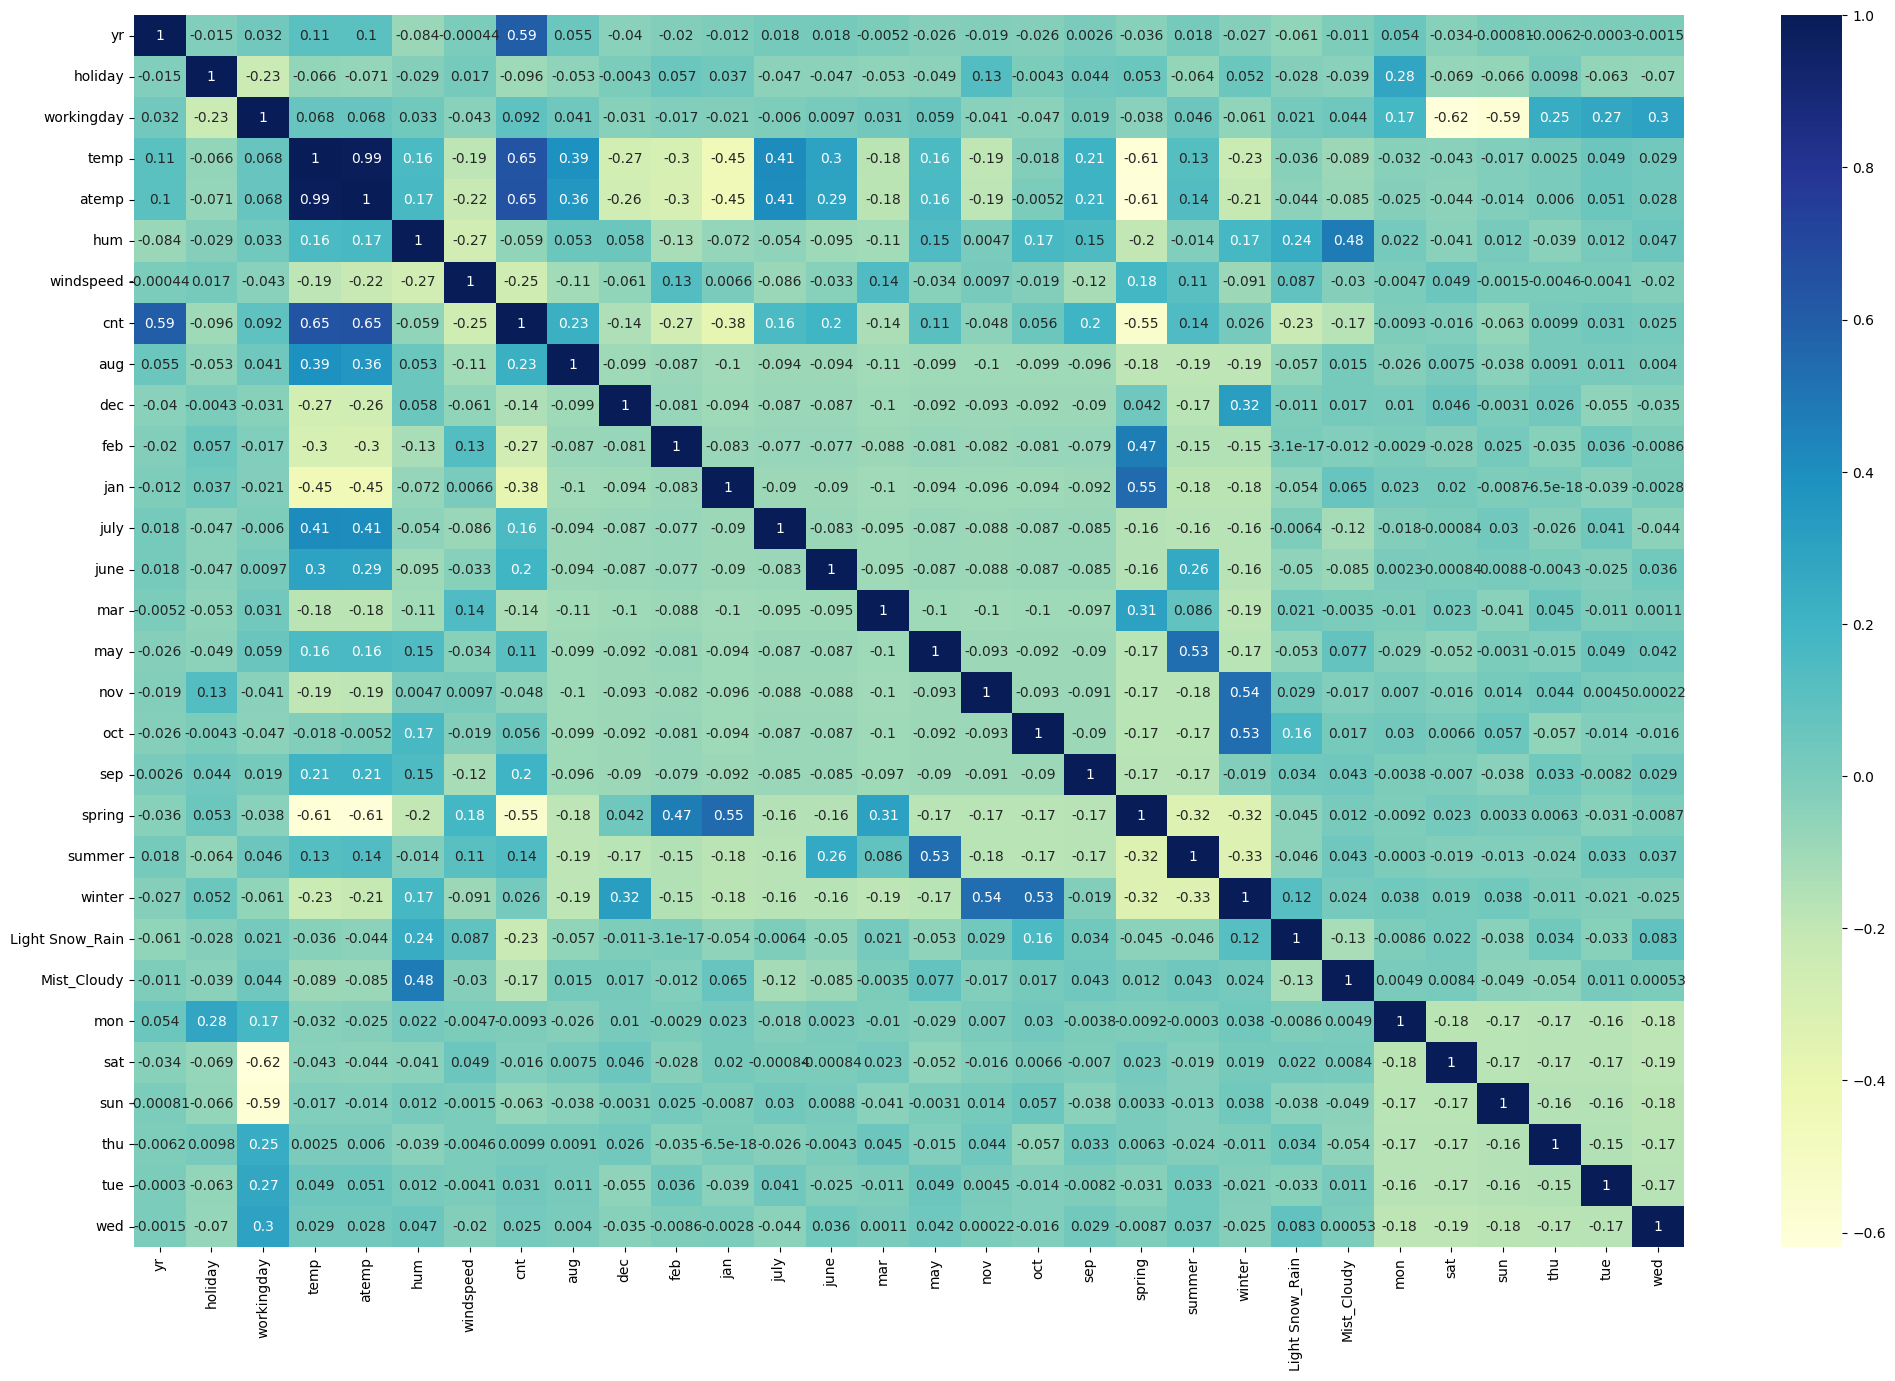

In [27]:
plt.figure(figsize=(25,16))
sns.heatmap(df_train.corr(),annot=True, cmap="YlGnBu")
plt.show()

In [28]:
#X_train, y_train

y_train=df_train.pop('cnt')
X_train=df_train

In [29]:
# Recursive feature elimination
lm=LinearRegression()
lm.fit(X_train,y_train)

rfe=RFE(lm, n_features_to_select=15)
rfe=rfe.fit(X_train,y_train)

In [30]:
# List of variable selection for top 15 features
list(zip(X_train.columns, rfe.support_,rfe.ranking_ ))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 8),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 14),
 ('mar', False, 15),
 ('may', False, 6),
 ('nov', False, 2),
 ('oct', False, 13),
 ('sep', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Light Snow_Rain', True, 1),
 ('Mist_Cloudy', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', False, 5),
 ('thu', False, 11),
 ('tue', False, 10),
 ('wed', False, 12)]

In [31]:
col=X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'jan',
       'july', 'sep', 'spring', 'summer', 'winter', 'Light Snow_Rain',
       'Mist_Cloudy', 'sat'],
      dtype='object')

In [32]:
#Checking the columns to be rejected
X_train.columns[~rfe.support_]


Index(['atemp', 'aug', 'dec', 'feb', 'june', 'mar', 'may', 'nov', 'oct', 'mon',
       'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [33]:
# creating the new data fream variables with selected RFE
X_train_rfe=X_train[col]

In [34]:
#  Bulding the 1st linear model

X_train_lrm1=sm.add_constant(X_train_rfe)
lrm1=sm.OLS(y_train,X_train_lrm1).fit()
lrm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          4.22e-191
Time:                        12:59:11   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2519      0.036      6.969      0.000       0.181       0.323
yr                  0.2305      0.008     28.795      0.000       0.215       0.246
holiday            -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday          0.0433      0.012      3.762      0.000       0.021       0.066
temp                0.5096      0.034     14.837      0.000       0.442       0.577
hum                -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed          -0.1863      0.025     -7.310      0.000      -0.236      -0.136
jan                -0.0345      0.017     -1.989      0.047      -0.069      -0.000
july               -0.0529      0.018     -2.931      0.004      -0.088      -0.017
sep                 0.0814      0.016      4.945      0.000       0.049       0.114
spring             -0.0509      0.021     -2.464      0.014      -0.091      -0.010
summer              0.0508      0.015      3.423      0.001       0.022       0.080
winter              0.0933      0.017      5.403      0.000       0.059       0.127
Light Snow_Rain    -0.2475      0.026     -9.507      0.000      -0.299      -0.196
Mist_Cloudy        -0.0563      0.010     -5.439      0.000      -0.077      -0.036
sat                 0.0536      0.014      3.694      0.000       0.025       0.082
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
vif=pd.DataFrame()
x=X_train_rfe
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
4,hum,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
9,spring,4.53
11,winter,3.46
10,summer,2.85
13,Mist_Cloudy,2.29
0,yr,2.09
14,sat,1.98


In [36]:
# As looking the p val and VIP there humidity is higher value hence dropping the Humidity

X_train_new=X_train_rfe.drop(['hum'],axis=1)

In [37]:
# Bulding the 2nd linear Regrassion model

X_train_lrm2=sm.add_constant(X_train_new)
lrm2=sm.OLS(y_train,X_train_lrm2).fit()
lrm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          1.60e-188
Time:                        12:59:11   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1737      0.031      5.520      0.000       0.112       0.235
yr                  0.2345      0.008     29.009      0.000       0.219       0.250
holiday            -0.0558      0.027     -2.042      0.042      -0.109      -0.002
workingday          0.0464      0.012      3.966      0.000       0.023       0.069
temp                0.4722      0.034     14.005      0.000       0.406       0.538
windspeed          -0.1563      0.025     -6.286      0.000      -0.205      -0.107
jan                -0.0392      0.018     -2.227      0.026      -0.074      -0.005
july               -0.0479      0.018     -2.614      0.009      -0.084      -0.012
sep                 0.0755      0.017      4.527      0.000       0.043       0.108
spring             -0.0599      0.021     -2.867      0.004      -0.101      -0.019
summer              0.0445      0.015      2.967      0.003       0.015       0.074
winter              0.0784      0.017      4.562      0.000       0.045       0.112
Light Snow_Rain    -0.2908      0.024    -11.977      0.000      -0.339      -0.243
Mist_Cloudy        -0.0813      0.009     -9.437      0.000      -0.098      -0.064
sat                 0.0583      0.015      3.968      0.000       0.029       0.087
==============================================================================
Omnibus:                       67.830   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.565
Skew:                          -0.692   Prob(JB):                     1.84e-36
Kurtosis:                       5.415   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
vif=pd.DataFrame()
x=X_train_new
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.68
8,spring,3.07
9,summer,2.34
0,yr,2.08
10,winter,1.98
13,sat,1.97
5,jan,1.62
6,july,1.59


In [39]:
# As looking the VIF val temp has higher VIF-value hence dropping the temp column

X_train_new=X_train_new.drop(['temp'],axis=1)

In [40]:
# Bulding the 3rd linear Regrassion model

X_train_lrm3=sm.add_constant(X_train_new)
lrm3=sm.OLS(y_train,X_train_lrm3).fit()
lrm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     135.7
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          6.44e-154
Time:                        12:59:11   Log-Likelihood:                 425.63
No. Observations:                 510   AIC:                            -823.3
Df Residuals:                     496   BIC:                            -764.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5444      0.020     27.118      0.000       0.505       0.584
yr                  0.2478      0.009     26.153      0.000       0.229       0.266
holiday            -0.0567      0.032     -1.757      0.080      -0.120       0.007
workingday          0.0478      0.014      3.466      0.001       0.021       0.075
windspeed          -0.1878      0.029     -6.426      0.000      -0.245      -0.130
jan                -0.1026      0.020     -5.112      0.000      -0.142      -0.063
july               -0.0095      0.021     -0.446      0.656      -0.052       0.032
sep                 0.0710      0.020      3.610      0.000       0.032       0.110
spring             -0.2602      0.018    -14.483      0.000      -0.296      -0.225
summer             -0.0427      0.016     -2.651      0.008      -0.074      -0.011
winter             -0.0762      0.016     -4.903      0.000      -0.107      -0.046
Light Snow_Rain    -0.3034      0.029    -10.593      0.000      -0.360      -0.247
Mist_Cloudy        -0.0882      0.010     -8.688      0.000      -0.108      -0.068
sat                 0.0562      0.017      3.243      0.001       0.022       0.090
==============================================================================
Omnibus:                       34.639   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.598
Skew:                          -0.421   Prob(JB):                     3.46e-15
Kurtosis:                       4.557   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
vif=pd.DataFrame()
x=X_train_new
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,windspeed,4.27
2,workingday,3.83
7,spring,2.97
8,summer,2.29
9,winter,1.98
0,yr,1.91
12,sat,1.69
4,jan,1.60
11,Mist_Cloudy,1.57
5,july,1.30


In [42]:
# As looking the p val july has higher p-value hence dropping the july column

X_train_new=X_train_new.drop(['july'],axis=1)

In [43]:
# Bulding the 4th linear Regrassion model

X_train_lrm4=sm.add_constant(X_train_new)
lrm4=sm.OLS(y_train,X_train_lrm4).fit()
lrm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     147.2
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          5.73e-155
Time:                        12:59:11   Log-Likelihood:                 425.53
No. Observations:                 510   AIC:                            -825.1
Df Residuals:                     497   BIC:                            -770.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5406      0.018     29.655      0.000       0.505       0.576
yr                  0.2478      0.009     26.179      0.000       0.229       0.266
holiday            -0.0563      0.032     -1.746      0.081      -0.120       0.007
workingday          0.0481      0.014      3.489      0.001       0.021       0.075
windspeed          -0.1877      0.029     -6.429      0.000      -0.245      -0.130
jan                -0.1027      0.020     -5.118      0.000      -0.142      -0.063
sep                 0.0737      0.019      3.933      0.000       0.037       0.111
spring             -0.2568      0.016    -15.797      0.000      -0.289      -0.225
summer             -0.0393      0.014     -2.768      0.006      -0.067      -0.011
winter             -0.0730      0.014     -5.303      0.000      -0.100      -0.046
Light Snow_Rain    -0.3035      0.029    -10.606      0.000      -0.360      -0.247
Mist_Cloudy        -0.0879      0.010     -8.685      0.000      -0.108      -0.068
sat                 0.0564      0.017      3.254      0.001       0.022       0.090
==============================================================================
Omnibus:                       34.767   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.525
Skew:                          -0.424   Prob(JB):                     3.58e-15
Kurtosis:                       4.553   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
vif=pd.DataFrame()
x=X_train_new
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,windspeed,4.12
2,workingday,3.54
6,spring,2.68
7,summer,2.01
0,yr,1.89
8,winter,1.78
11,sat,1.62
4,jan,1.60
10,Mist_Cloudy,1.57
5,sep,1.20


In [45]:
# As looking the p-val holiday has higher p-value hence dropping the holiday column

X_train_new=X_train_new.drop(['holiday'],axis=1)

In [46]:
# Bulding the 5th linear Regrassion model

X_train_lrm5=sm.add_constant(X_train_new)
lrm5=sm.OLS(y_train,X_train_lrm5).fit()
lrm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     159.7
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          2.01e-155
Time:                        12:59:11   Log-Likelihood:                 423.97
No. Observations:                 510   AIC:                            -823.9
Df Residuals:                     498   BIC:                            -773.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5332      0.018     30.023      0.000       0.498       0.568
yr                  0.2480      0.009     26.146      0.000       0.229       0.267
workingday          0.0564      0.013      4.353      0.000       0.031       0.082
windspeed          -0.1887      0.029     -6.450      0.000      -0.246      -0.131
jan                -0.1033      0.020     -5.138      0.000      -0.143      -0.064
sep                 0.0715      0.019      3.815      0.000       0.035       0.108
spring             -0.2581      0.016    -15.860      0.000      -0.290      -0.226
summer             -0.0394      0.014     -2.768      0.006      -0.067      -0.011
winter             -0.0743      0.014     -5.392      0.000      -0.101      -0.047
Light Snow_Rain    -0.3023      0.029    -10.546      0.000      -0.359      -0.246
Mist_Cloudy        -0.0874      0.010     -8.623      0.000      -0.107      -0.067
sat                 0.0648      0.017      3.887      0.000       0.032       0.098
==============================================================================
Omnibus:                       39.401   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.660
Skew:                          -0.459   Prob(JB):                     5.04e-18
Kurtosis:                       4.705   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
vif=pd.DataFrame()
x=X_train_new
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,windspeed,4.04
1,workingday,3.29
5,spring,2.65
6,summer,2.00
0,yr,1.88
7,winter,1.73
3,jan,1.60
9,Mist_Cloudy,1.57
10,sat,1.56
4,sep,1.18


Observing minimal multicollinearity among the predictors and significant p-values for all predictors, we are inclined to consider the model mentioned above, i.e., lrm5.


In [48]:
lrm5.params

const              0.533171
yr                 0.248004
workingday         0.056374
windspeed         -0.188695
jan               -0.103255
sep                0.071471
spring            -0.258093
summer            -0.039401
winter            -0.074260
Light Snow_Rain   -0.302344
Mist_Cloudy       -0.087382
sat                0.064819
dtype: float64

# 4. Residual analysis

In [49]:
X_train_lrm5

,const,yr,workingday,windspeed,jan,sep,spring,summer,winter,Light Snow_Rain,Mist_Cloudy,sat
576,1.0,1,1,0.264686,0,0,0,0,0,0,0,0
426,1.0,1,0,0.255342,0,0,1,0,0,0,1,1
728,1.0,1,0,0.663106,0,0,1,0,0,0,0,0
482,1.0,1,0,0.188475,0,0,0,1,0,0,1,1
111,1.0,0,1,0.380981,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,1,0.187140,0,0,0,0,0,0,0,0
53,1.0,0,1,0.111379,0,0,1,0,0,0,0,0
350,1.0,0,0,0.431816,0,0,0,0,1,0,1,1
79,1.0,0,1,0.529881,0,0,0,1,0,0,1,0


In [50]:
y_train_pred=lrm5.predict(X_train_lrm5)

Text(0.5, 0, 'Errors')

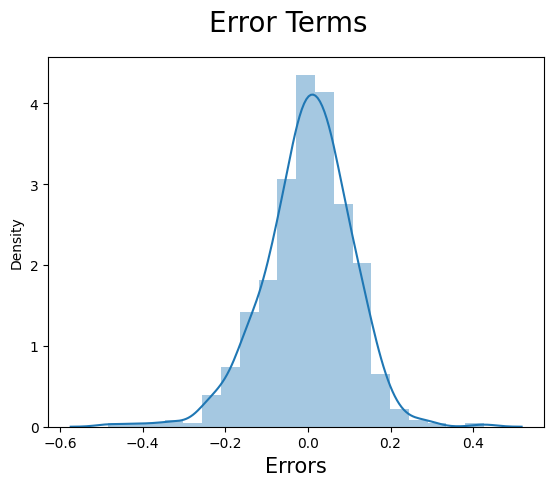

In [51]:
# Error Terms
fig=plt.figure()
sns.distplot((y_train-y_train_pred),bins=20)
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('Errors', fontsize=15)

In [52]:
x_train=np.arange(0,len(X_train),1)

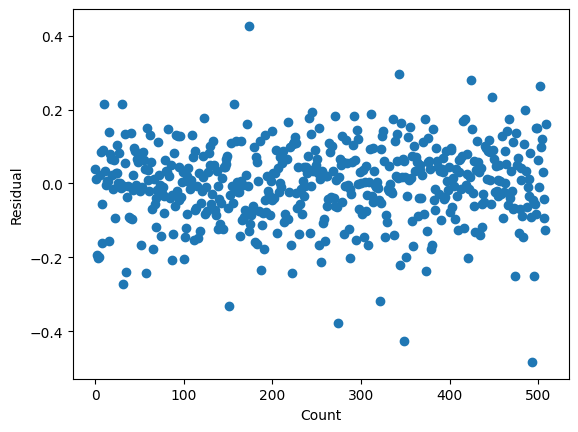

In [53]:
#Looking for patterns in resuduals
residual=y_train-y_train_pred
plt.scatter(x_train,residual)
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

Error terms are following normal distribution and there is now visibal pattren observed

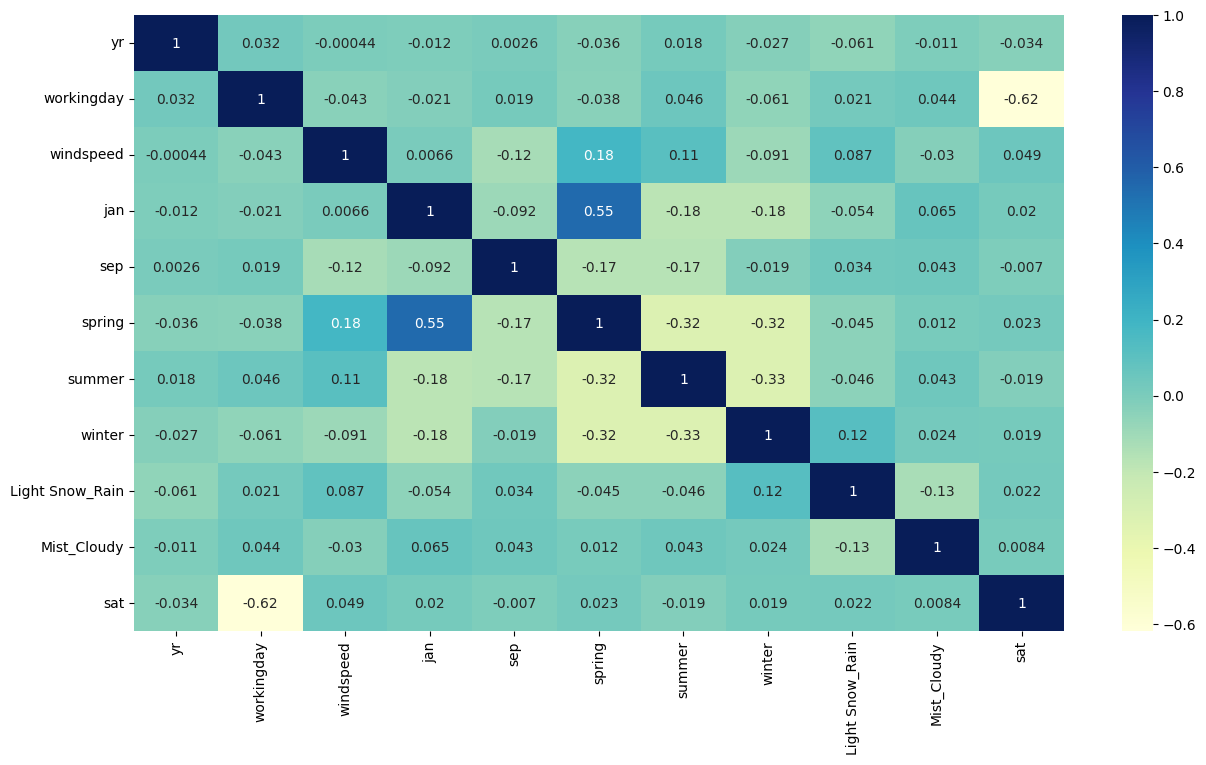

In [54]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot=True, cmap="YlGnBu")
plt.show()

# 5.Predictions and evaluation on the test set

In [55]:
num_vars=['temp','atemp','hum','windspeed','cnt']


df_test[num_vars]= scaler.transform(df_test[num_vars])

df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,summer,winter,Light Snow_Rain,Mist_Cloudy,mon,sat,sun,thu,tue,wed
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,1,1,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,1,0,0,0,0,0,0,0,0,1
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,1,0,1,0,0,0,1,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,0,0,0,0,0,1
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,1,0,0,0,0,0,0,1,0,0


In [56]:
y_test=df_test.pop('cnt')
X_test=df_test

In [57]:
test_col=X_train_new.columns

X_test=X_test[test_col]

X_test_lrm5=sm.add_constant(X_test)

In [58]:
y_pred=lrm5.predict(X_test_lrm5)

In [59]:
# Calculating r2 value
r2=r2_score(y_test,y_pred)
round(r2,2)

0.74

In [60]:
print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_pred))

0.7791032979320819
0.7417351441317017


Text(0.5, 0, 'y_test')

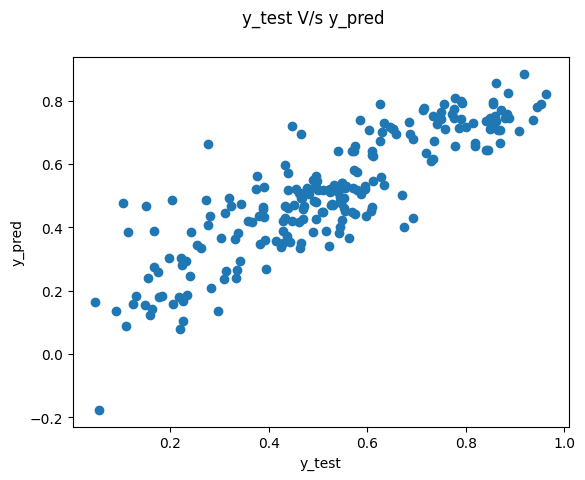

In [61]:
fig=plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test V/s y_pred')
plt.ylabel('y_pred')
plt.xlabel('y_test')

In [62]:
round(lrm5.params,4)

const              0.5332
yr                 0.2480
workingday         0.0564
windspeed         -0.1887
jan               -0.1033
sep                0.0715
spring            -0.2581
summer            -0.0394
winter            -0.0743
Light Snow_Rain   -0.3023
Mist_Cloudy       -0.0874
sat                0.0648
dtype: float64

Let's create the equation.

cnt= 0.5332+ 0.2480 * year + 0.0564 * workingday -0.1887 * windspeed -0.1033  X jan + 0.0715 * sep -0.2581 * spring - 0.0394 * summer - 0.0743 * winter - 0.3023* light snow_Rain-0.0874 * Mist_Clody + 0.0648 * sat

In [63]:
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7281


Text(0.5, 0, 'y_test')

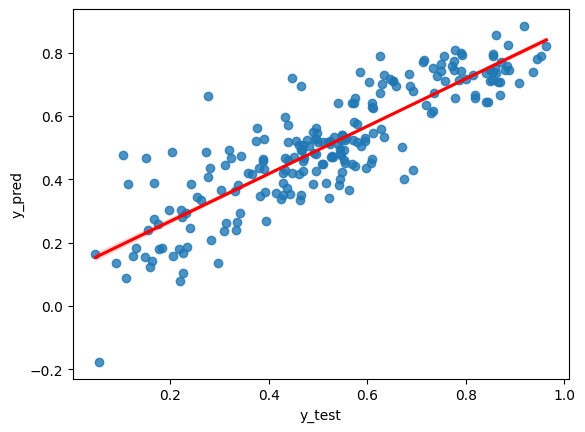

In [64]:
plt.figure()
sns.regplot(x=y_test, y=y_pred,fit_reg=True,line_kws={'color':'red'},ci=50)
fig.suptitle('y_test V/s y_pred')
plt.ylabel('y_pred')
plt.xlabel('y_test')

The positive coefficients indicate factors that, when increased, contribute to a rise in the count, while the negative coefficients suggest that factors with negative coefficients, when increased, contribute to a decrease in the total count.

As looking the coefficients Yr, workingday, sep is the deciding facor of the count, where the curve with +ve coefficient.